`Developing NLP and ML project:`
    
    - Collecting data
    - Understand Problem statement 
    - since it is text we need to follow NLP PipeLine
    - Developing ML Model
    - Testing model 
    - Save the model 
    - Load the model and test once again 
    - Depoly in any cloud [AWS , IBM , Google cloud , Mircosoft Azure , Heroku saleforce]
    

In [74]:
import numpy as np 
import pandas as pd 

`load the dataset and check whether important fetures are available or not:`

In [75]:
data = pd.read_csv('./spam.csv', encoding="ISO-8859-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [76]:
data.shape  # Number of rows and number of columns:

(5572, 5)

`Since feature 3 , 4 , 5 having lot of Null values I am going to check the count`

In [77]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [78]:
data.columns[2:]

Index(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [79]:
for i in data.columns[2:]:
    print('Number of unique content in ',i,'is :',data[i].unique())

Number of unique content in  Unnamed: 2 is : [nan ' PO Box 5249'
 ' the person is definitely special for u..... But if the person is so special'
 ' HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE JEN XXX\\""'
 ' wanted to say hi. HI!!!\\" Stop? Send STOP to 62468"'
 'this wont even start........ Datz confidence.."' 'GN' '.;-):-D"'
 'just been in bedbut mite go 2 thepub l8tr if uwana mt up?loads a luv Jenxxx.\\""'
 ' bt not his girlfrnd... G o o d n i g h t . . .@"' ' I\'ll come up"'
 ' don\'t miss ur best life for anything... Gud nyt..."'
 ' just as a shop has to give a guarantee on what they sell. B. G."'
 ' But at d end my love compromised me for everything:-(\\".. Gud mornin:-)"'
 ' the toughest is acting Happy with all unspoken pain inside..\\""'
 ' smoke hella weed\\""' '\\" not \\"what i need to do.\\""'
 'JUST GOT PAYED2DAY & I HAVBEEN GIVEN Aå£50 PAY RISE 4MY WORK & HAVEBEEN MADE PRESCHOOLCO-ORDINATOR 2I AM FEELINGOOD LUV\\""'
 ' justthought iåÕd sayhey! how u doin?nearly the endo

In [80]:
data = data.drop(data.columns[2:] , axis = 1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [81]:
data = data.rename(columns={'v1':'target' , 'v2':'E-mails'})

In [82]:
data.head()

,target,E-mails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


`let me find whether the data is balanced or not`

In [83]:
data['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

`It is a Imbalanced dataset but lets develop model with data what we have`

In [84]:
import matplotlib.pyplot as plt 

<AxesSubplot: xlabel='target', ylabel='count'>

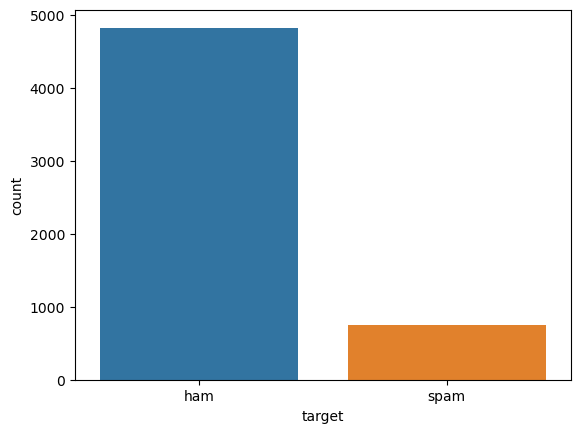

In [85]:
import seaborn as sns 
sns.countplot(x = data['target']) # countplot x , y cordinates:

In [87]:
data.head()

,target,E-mails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


`There are few preprocessing techniques which gives lot of information to develop RNN Models`

#### Counting number of words in each independent data

In [88]:
data['word_count'] = data['E-mails'].apply(lambda x: len(x.split()))

In [89]:
data.head()

,target,E-mails,word_count
0,ham,"Go until jurong point, crazy.. Available only ...",20
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",13


In [90]:
data['E-mails'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

#### character count 

In [91]:
def character_count(text):
    count = 0
    c = ''
    for i in text:
        c+=i
        count+=1
    return count

In [92]:
text = 'I am kamal'  # 10 characters:
character_count(text)

10

In [93]:
data['character_count'] = data['E-mails'].apply(lambda x: character_count(str(x)))

In [94]:
data.head()

,target,E-mails,word_count,character_count
0,ham,"Go until jurong point, crazy.. Available only ...",20,111
1,ham,Ok lar... Joking wif u oni...,6,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155
3,ham,U dun say so early hor... U c already then say...,11,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61


### Average count()

In [95]:
data['Average_count'] = data['character_count'] / data['word_count']

In [96]:
data.head()

,target,E-mails,word_count,character_count,Average_count
0,ham,"Go until jurong point, crazy.. Available only ...",20,111,5.550000
1,ham,Ok lar... Joking wif u oni...,6,29,4.833333
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,5.535714
3,ham,U dun say so early hor... U c already then say...,11,49,4.454545
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,4.692308


#### stopwords count 

In [97]:
data['stopwords_count'] = data['E-mails'].apply(lambda x:len([i for i in x.split() if i in stopwords.words('english')]))

In [98]:
data.head()

,target,E-mails,word_count,character_count,Average_count,stopwords_count
0,ham,"Go until jurong point, crazy.. Available only ...",20,111,5.550000,4
1,ham,Ok lar... Joking wif u oni...,6,29,4.833333,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,5.535714,5
3,ham,U dun say so early hor... U c already then say...,11,49,4.454545,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,4.692308,5


#### Number count:

In [99]:
data['Number_count'] = data['E-mails'].apply(lambda x: len([i for i in x if i.isdigit()]))

In [100]:
data.head()

,target,E-mails,word_count,character_count,Average_count,stopwords_count,Number_count
0,ham,"Go until jurong point, crazy.. Available only ...",20,111,5.550000,4,0
1,ham,Ok lar... Joking wif u oni...,6,29,4.833333,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,5.535714,5,25
3,ham,U dun say so early hor... U c already then say...,11,49,4.454545,2,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,4.692308,5,0


In [101]:
data['E-mails'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

`Preprocess the data`

- clean the data [punctuations]
- lower text 
- remove stopwords
- Apply stemming or lematization 

In [102]:
data['target'] = data['target'].map({'ham':0 , 'spam':1}).astype(int)

`In the target feature 0-> good incoming mail and 1-> Bad incoming Mail`

In [103]:
data.head()

,target,E-mails,word_count,character_count,Average_count,stopwords_count,Number_count
0,0,"Go until jurong point, crazy.. Available only ...",20,111,5.550000,4,0
1,0,Ok lar... Joking wif u oni...,6,29,4.833333,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,5.535714,5,25
3,0,U dun say so early hor... U c already then say...,11,49,4.454545,2,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,61,4.692308,5,0


`Lets solve indepedent feature:`

`regex -> is an regular expressions which is used to find patterns in the text data`


`regex : https://docs.python.org/3/library/re.html`
        

In [104]:
a = 'I am computer 230 vision scientist 35 and my mbl number is 7337513242'
c = ''
for i in a:
    if i.isnumeric():
        c+=i
print(c)

230357337513242


`In this regex d refers to numbers`

In [105]:
import re 
a = 'I am computer 230 vision scientist 35 and my mbl number is 7337513242'

sol = re.findall('\d{10}' , a)

print(sol)

['7337513242']


`Using regex I am collecting only text and numbers`

- Ex: Bring me 10 apples from the supermarket:
- Ex: Bring me apples from the supermarket: 

In [106]:
data.head()

,target,E-mails,word_count,character_count,Average_count,stopwords_count,Number_count
0,0,"Go until jurong point, crazy.. Available only ...",20,111,5.550000,4,0
1,0,Ok lar... Joking wif u oni...,6,29,4.833333,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,5.535714,5,25
3,0,U dun say so early hor... U c already then say...,11,49,4.454545,2,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,61,4.692308,5,0


`regex sub: keep what we want and removes what we dont want:`

In [107]:
a = 'I am computer 230 .&* vision scientist 35 and my mbl number is 7337513242'
sol = re.sub('[^a-zA-Z]',' ',a)
sol

'I am computer         vision scientist    and my mbl number is           '

`Applying same logic for first row:`
    

In [108]:
print(data['E-mails'][0])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


In [109]:
import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
s = PorterStemmer()

In [110]:
sol = re.sub('[^a-zA-Z0-9]',' ',data['E-mails'][0])
print(sol)
sol = sol.lower()
sol = sol.split()
sol = [i for i in sol if i not in stopwords.words('english')]
sol = [s.stem(j) for j in sol]
sol = ' '.join(sol)
print()
print(sol)

Go until jurong point  crazy   Available only in bugis n great world la e buffet    Cine there got amore wat   

go jurong point crazi avail bugi n great world la e buffet cine got amor wat


In [111]:
data.head()

,target,E-mails,word_count,character_count,Average_count,stopwords_count,Number_count
0,0,"Go until jurong point, crazy.. Available only ...",20,111,5.550000,4,0
1,0,Ok lar... Joking wif u oni...,6,29,4.833333,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,5.535714,5,25
3,0,U dun say so early hor... U c already then say...,11,49,4.454545,2,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,61,4.692308,5,0


In [112]:
# preprocessing:
clean_text = []
for i in data.index:
    sol = re.sub('[^a-zA-Z0-9]',' ',data['E-mails'][i])
    sol = sol.lower()
    sol = sol.split()
    sol = [i for i in sol if i not in stopwords.words('english')]
    sol = [s.stem(j) for j in sol]
    sol = ' '.join(sol)
    clean_text.append(sol)
    

In [113]:
clean_text

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6day 16 tsandc appli repli hl 4 info',
 'urgent 1 week free mem

`On the top if raw data I applied word count , character count , stopwords count , average count , number count and preprocess the complete Now my independent var is cleaned`


`conveting text into numbers but not with tfidf Now i am using padding technique and for model development I am using RNN models`


In [114]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [118]:
clean_text[0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [121]:
voc_size = 1000

vectors = [one_hot(i , voc_size) for i in clean_text]

vectors

[[273,
  226,
  471,
  284,
  122,
  396,
  792,
  692,
  618,
  640,
  348,
  690,
  704,
  703,
  846,
  208],
 [378, 532, 584, 278, 416, 468],
 [399,
  696,
  233,
  824,
  512,
  570,
  322,
  80,
  213,
  643,
  13,
  428,
  578,
  226,
  322,
  400,
  976,
  696,
  203,
  945,
  709,
  42,
  603,
  648,
  345],
 [416, 45, 361, 18, 435, 416, 603, 748, 361],
 [972, 792, 125, 255, 471, 918, 434],
 [229,
  824,
  195,
  589,
  717,
  63,
  190,
  869,
  934,
  397,
  8,
  378,
  496,
  945,
  545,
  582,
  727,
  645,
  307],
 [969, 929, 869, 108, 139, 869, 416, 478],
 [994,
  382,
  845,
  845,
  423,
  367,
  474,
  782,
  695,
  334,
  954,
  937,
  950,
  907,
  188,
  334],
 [990,
  367,
  912,
  273,
  131,
  874,
  146,
  594,
  266,
  480,
  599,
  496,
  480,
  565,
  649,
  497,
  42,
  402],
 [548,
  974,
  36,
  416,
  947,
  128,
  95,
  653,
  234,
  548,
  482,
  399,
  599,
  548,
  95,
  577,
  399,
  295],
 [471, 143, 642, 114, 305, 12, 680, 684, 922, 867, 734, 462]

#### padding technique

In [124]:
c = []
for i in vectors:
    c.append(len(i))
print(c)

[16, 6, 25, 9, 7, 19, 8, 16, 18, 18, 12, 23, 20, 15, 2, 16, 3, 12, 7, 24, 3, 7, 6, 15, 5, 15, 3, 12, 7, 7, 9, 18, 3, 5, 14, 14, 5, 4, 4, 11, 9, 11, 18, 1, 9, 4, 5, 4, 8, 15, 5, 17, 10, 21, 18, 8, 23, 4, 2, 5, 10, 8, 3, 6, 18, 14, 13, 23, 7, 4, 6, 2, 7, 3, 2, 4, 6, 5, 3, 6, 3, 3, 5, 2, 3, 5, 13, 16, 4, 8, 6, 17, 21, 15, 16, 14, 6, 5, 21, 6, 13, 9, 16, 19, 7, 9, 4, 8, 12, 4, 3, 3, 17, 18, 18, 17, 19, 10, 9, 17, 19, 5, 20, 6, 5, 2, 17, 1, 19, 4, 1, 5, 3, 20, 28, 5, 2, 4, 20, 11, 3, 3, 20, 4, 4, 6, 19, 9, 3, 5, 3, 11, 4, 16, 35, 2, 2, 10, 12, 18, 10, 7, 6, 22, 22, 7, 17, 9, 8, 7, 7, 17, 3, 13, 7, 7, 4, 17, 6, 12, 14, 3, 5, 2, 4, 13, 3, 16, 5, 13, 9, 18, 4, 10, 8, 6, 4, 8, 13, 4, 4, 12, 20, 3, 5, 10, 17, 5, 10, 5, 6, 3, 5, 3, 3, 6, 5, 7, 4, 13, 5, 17, 3, 19, 20, 7, 24, 5, 19, 3, 15, 4, 4, 6, 25, 6, 7, 2, 16, 17, 6, 6, 6, 24, 4, 5, 3, 5, 14, 21, 7, 27, 0, 18, 4, 7, 6, 2, 16, 6, 1, 11, 6, 17, 3, 4, 6, 24, 4, 15, 5, 18, 21, 7, 3, 1, 5, 3, 4, 6, 3, 4, 4, 1, 14, 7, 1, 20, 14, 20, 5, 9, 4, 2, 5, 

In [125]:
print(max(c))

78


In [126]:
sent_length = 78

pad_vectors = pad_sequences(vectors , maxlen=sent_length, padding='post')
pad_vectors

array([[273, 226, 471, ...,   0,   0,   0],
       [378, 532, 584, ...,   0,   0,   0],
       [399, 696, 233, ...,   0,   0,   0],
       ...,
       [355, 788,   1, ...,   0,   0,   0],
       [547, 636,   2, ...,   0,   0,   0],
       [889, 127, 482, ...,   0,   0,   0]])

In [127]:
#### Independent data 
pad_vectors

array([[273, 226, 471, ...,   0,   0,   0],
       [378, 532, 584, ...,   0,   0,   0],
       [399, 696, 233, ...,   0,   0,   0],
       ...,
       [355, 788,   1, ...,   0,   0,   0],
       [547, 636,   2, ...,   0,   0,   0],
       [889, 127, 482, ...,   0,   0,   0]])

In [128]:
### dependent data
data['target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int32

`https://colah.github.io/posts/2015-08-Understanding-LSTMs/index.html`

In [129]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,LSTM,Activation
from tensorflow.keras.activations import sigmoid,relu,tanh,softmax


In [130]:
model = Sequential()

model.add(Embedding(voc_size , 10 , input_length=sent_length))  # Embedded layer:
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))


In [131]:
model.compile(optimizer='adam' , loss='binary_crossentropy',metrics=['Acc'])


In [132]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 78, 10)            10000     
                                                                 
 lstm (LSTM)                 (None, 100)               44400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 54,501
Trainable params: 54,501
Non-trainable params: 0
_________________________________________________________________


In [133]:
X = np.array(pad_vectors)
y = np.array(data['target'])

In [134]:
from sklearn.model_selection import train_test_split


In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [136]:
len(X_train)

3733

In [138]:
model.fit(X_train , y_train , batch_size=32 ,epochs=20)

Epoch 1/20
117/117 [==============================] - 3s 29ms/step - loss: 0.3879 - Acc: 0.8674
Epoch 2/20
117/117 [==============================] - 3s 29ms/step - loss: 0.3876 - Acc: 0.8674
Epoch 3/20
117/117 [==============================] - 3s 28ms/step - loss: 0.3881 - Acc: 0.8674
Epoch 4/20
117/117 [==============================] - 3s 28ms/step - loss: 0.3913 - Acc: 0.8674
Epoch 5/20
117/117 [==============================] - 3s 30ms/step - loss: 0.3875 - Acc: 0.8674
Epoch 6/20
117/117 [==============================] - 4s 32ms/step - loss: 0.3875 - Acc: 0.8674
Epoch 7/20
117/117 [==============================] - 4s 36ms/step - loss: 0.3876 - Acc: 0.8674
Epoch 8/20
117/117 [==============================] - 4s 31ms/step - loss: 0.3878 - Acc: 0.8674
Epoch 9/20
117/117 [==============================] - 3s 28ms/step - loss: 0.3880 - Acc: 0.8674
Epoch 10/20
117/117 [==============================] - 3s 28ms/step - loss: 0.3873 - Acc: 0.8674
Epoch 11/20
117/117 [==================

In [139]:
## test validation report:


In [140]:
y_test_pred = model.predict(X_test)

y_test_pred

58/58 [==============================] - 3s 9ms/step


array([[0.12483927],
       [0.12483926],
       [0.12483927],
       ...,
       [0.12483935],
       [0.1248393 ],
       [0.12483913]], dtype=float32)

In [141]:
c = []
for i in y_test_pred:
    if i > 0.5:
        c.append(1)
    else:
        c.append(0)

In [142]:
c

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [143]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [144]:
accuracy_score(y_test,c)

0.8629690048939641

In [145]:
confusion_matrix(y_test, c)

array([[1587,    0],
       [ 252,    0]], dtype=int64)

In [147]:
print(classification_report(y_test , c))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1587
           1       0.00      0.00      0.00       252

    accuracy                           0.86      1839
   macro avg       0.43      0.50      0.46      1839
weighted avg       0.74      0.86      0.80      1839



C:\Users\korla\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\korla\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\korla\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Working with real data :

In [183]:
a = ['Hai I am offering a job']
c = []
sol = re.sub('[^a-zA-Z0-9]',' ',a[0])
sol = sol.lower()
sol = sol.split()
sol = [i for i in sol if i not in stopwords.words('english')]
sol = [s.stem(j) for j in sol]
c.append(' '.join(sol))
print(sol)
print(c)
ve = [one_hot(i,voc_size) for i in c]
print(ve)
sent_length = 78
pad_vectors = pad_sequences(ve , maxlen=sent_length, padding='post')
print(pad_vectors)
if model.predict(pad_vectors) > 0.5:
    print('Spam mail')
else:
    print('Ham mail')
    

['hai', 'offer', 'job']
['hai offer job']
[[161, 723, 503]]
[[161 723 503   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]]
1/1 [==============================] - 0s 26ms/step
Ham mail
